# Importing dependencies

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf

# Load Data

In [2]:
data=tf.keras.utils.image_dataset_from_directory("defects",batch_size=32,image_size=(200,200))

Found 1800 files belonging to 6 classes.


In [3]:
data_iterator=data.as_numpy_iterator()
batch=data_iterator.next()

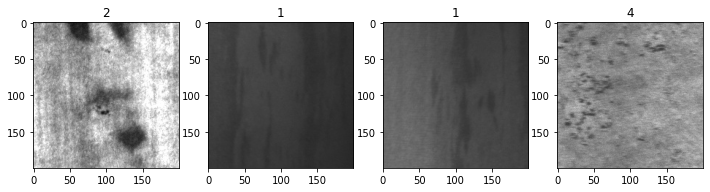

In [4]:
fig,ax=plt.subplots(ncols=4,figsize=(12,12))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

* 0 crazing
* 1 inclusion
* 2 patches
* 3 pitted in surface
* 4 rolled
* 5 scraches

# Scale the data 

In [5]:
data=data.map(lambda x,y:(x/255,y))
data.as_numpy_iterator().next()

(array([[[[0.7411765 , 0.7411765 , 0.7411765 ],
          [0.73333335, 0.73333335, 0.73333335],
          [0.73333335, 0.73333335, 0.73333335],
          ...,
          [0.9411765 , 0.9411765 , 0.9411765 ],
          [0.9843137 , 0.9843137 , 0.9843137 ],
          [0.99215686, 0.99215686, 0.99215686]],
 
         [[0.7490196 , 0.7490196 , 0.7490196 ],
          [0.7411765 , 0.7411765 , 0.7411765 ],
          [0.7607843 , 0.7607843 , 0.7607843 ],
          ...,
          [0.9529412 , 0.9529412 , 0.9529412 ],
          [0.9843137 , 0.9843137 , 0.9843137 ],
          [0.99607843, 0.99607843, 0.99607843]],
 
         [[0.77254903, 0.77254903, 0.77254903],
          [0.7607843 , 0.7607843 , 0.7607843 ],
          [0.78039217, 0.78039217, 0.78039217],
          ...,
          [0.99215686, 0.99215686, 0.99215686],
          [0.9843137 , 0.9843137 , 0.9843137 ],
          [0.9764706 , 0.9764706 , 0.9764706 ]],
 
         ...,
 
         [[0.5372549 , 0.5372549 , 0.5372549 ],
          [0.53725

# Split the data

In [6]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [7]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Building Deep Learning Model

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (2,2), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 199, 199, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 98, 98, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 49, 49, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 128)       32896     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 128)      0

In [11]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Training model

In [12]:
history = model.fit(train,
        batch_size = 32,
        epochs=20,
        validation_data=val,
        verbose=1, shuffle=True)

Epoch 1/20
39/39 [==============================] - 32s 785ms/step - loss: 2.5045 - accuracy: 0.2035 - val_loss: 1.6850 - val_accuracy: 0.2839
Epoch 2/20
39/39 [==============================] - 29s 736ms/step - loss: 1.6491 - accuracy: 0.3333 - val_loss: 1.4672 - val_accuracy: 0.3047
Epoch 3/20
39/39 [==============================] - 30s 765ms/step - loss: 1.4226 - accuracy: 0.4559 - val_loss: 1.1172 - val_accuracy: 0.5234
Epoch 4/20
39/39 [==============================] - 30s 772ms/step - loss: 1.1245 - accuracy: 0.5954 - val_loss: 2.3618 - val_accuracy: 0.2708
Epoch 5/20
39/39 [==============================] - 40s 1s/step - loss: 0.9516 - accuracy: 0.7051 - val_loss: 0.5043 - val_accuracy: 0.8438
Epoch 6/20
39/39 [==============================] - 44s 1s/step - loss: 0.7590 - accuracy: 0.7556 - val_loss: 0.6219 - val_accuracy: 0.7812
Epoch 7/20
39/39 [==============================] - 34s 863ms/step - loss: 0.6239 - accuracy: 0.7909 - val_loss: 0.3388 - val_accuracy: 0.9010
Epoch

In [81]:
history.history

{'loss': [2.5045316219329834,
  1.6491366624832153,
  1.4226374626159668,
  1.1245027780532837,
  0.9515806436538696,
  0.7590495944023132,
  0.6239091753959656,
  0.5948356986045837,
  0.5386859178543091,
  0.5943503975868225,
  0.4240896701812744,
  0.29839634895324707,
  0.45498162508010864,
  0.3688857853412628,
  0.24402420222759247,
  0.2650347650051117,
  0.41477668285369873,
  0.37325626611709595,
  0.3623238205909729,
  0.23040543496608734],
 'accuracy': [0.20352564752101898,
  0.3333333432674408,
  0.4559294879436493,
  0.5953525900840759,
  0.7051281929016113,
  0.7556089758872986,
  0.7908653616905212,
  0.8052884340286255,
  0.8541666865348816,
  0.8253205418586731,
  0.8661859035491943,
  0.9134615659713745,
  0.8661859035491943,
  0.9094551205635071,
  0.9174679517745972,
  0.9214743375778198,
  0.8910256624221802,
  0.9230769276618958,
  0.90625,
  0.9447115659713745],
 'val_loss': [1.6849628686904907,
  1.467241883277893,
  1.1171993017196655,
  2.361786127090454,
  0.

#  Plot Performance

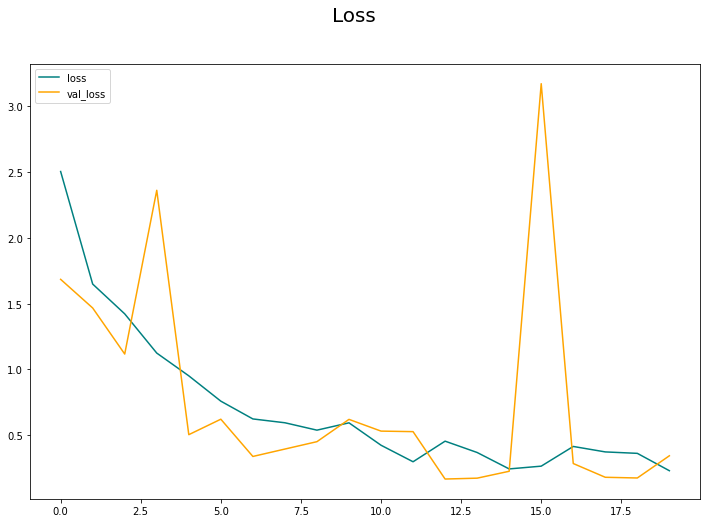

In [82]:
fig = plt.figure(figsize=(12,8))
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

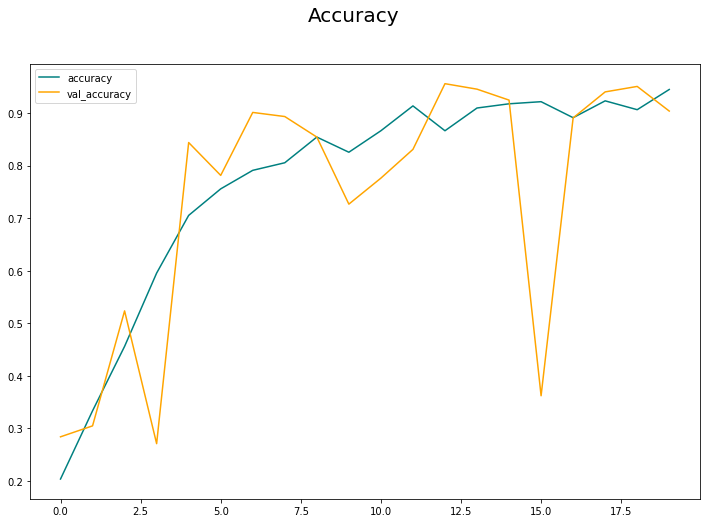

In [83]:
fig = plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate

In [124]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)

1/1 [==============================] - 0s 56ms/step


In [125]:
len(yhat)

8

In [127]:
yhat

array([[8.74870300e-01, 1.04551334e-09, 1.09454773e-01, 1.54458825e-02,
        2.29077574e-04, 5.18207202e-08],
       [6.56114807e-09, 9.86788034e-01, 3.38088491e-08, 4.74302797e-04,
        3.64713982e-04, 1.23729110e-02],
       [3.28629918e-04, 1.26092577e-20, 9.99671102e-01, 1.37901490e-09,
        3.29660995e-12, 1.80459679e-07],
       [7.69488615e-05, 9.43081826e-02, 1.25717750e-04, 7.44197667e-01,
        1.37071282e-01, 2.42203102e-02],
       [2.41934639e-10, 1.29433460e-08, 4.17322190e-06, 1.41269527e-04,
        3.59469329e-11, 9.99854565e-01],
       [9.49184953e-10, 9.97268319e-01, 3.33438233e-09, 5.40351903e-04,
        1.90235529e-04, 2.00118707e-03],
       [1.63590073e-06, 1.88271997e-06, 9.72608177e-06, 1.35180885e-02,
        1.82129991e-08, 9.86468673e-01],
       [4.31903864e-08, 9.87350404e-01, 7.29202441e-08, 9.05857049e-03,
        1.02824520e-03, 2.56264722e-03]], dtype=float32)

In [128]:
y.shape

(8,)

In [130]:
y

array([0, 1, 2, 3, 3, 1, 3, 1])

In [146]:
y_max=[]
index=[]
for i in range(len(yhat)):
    y_max.append(yhat[i].max())
    index.append(yhat[i].argmax())

In [150]:
print("Predicted values:",index)
print("True Values:",y)

Predicted values: [0, 1, 2, 3, 5, 1, 5, 1]
True Values: [0 1 2 3 3 1 3 1]


In [152]:
result=pd.DataFrame({"True_values":y,"Predicted_values":index})
result

,True_values,Predicted_values
0,0,0
1,1,1
2,2,2
3,3,3
4,3,5
5,1,1
6,3,5
7,1,1
